In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### MF TN single

In [53]:
i = '10Hz'
j = 'we'
MFfe, MFfi = np.load(f'data\\MF_out_{j}.npy')
# MFcee, MFcii = np.load(f'data\\MF_out_cov.npy')
TNfe, TNfi = np.load(f'data\\TNetwork_out_{i}.npy')
MFtt = np.linspace(0,1000, MFfe.size)
TNtt = np.linspace(0,1000, TNfe.size)

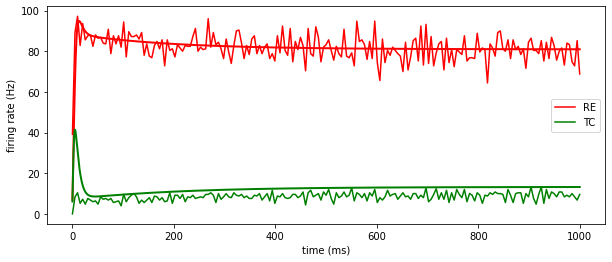

In [54]:
plt.figure(figsize=(10,4))
plt.plot(TNtt, TNfi, 'r', label='RE')
plt.plot(MFtt, MFfi, 'r', lw=2)
# plt.fill_between(MFtt, MFfi-MFcii, MFfi+MFcii, color='r', alpha=0.2)
plt.plot(TNtt, TNfe, 'g', label='TC')
plt.plot(MFtt, MFfe, 'g', lw=2)
# plt.fill_between(MFtt, MFfe-MFcee, MFfe+MFcee, color='g', alpha=0.2)

plt.xlabel("time (ms)")
plt.ylabel("firing rate (Hz)")
plt.legend()
# plt.savefig(f"gfx\\comp_{i}.png", dpi=250)

#### MF TN scan

In [23]:
MFfe, MFfi = np.load("data\\MF_out_scan.npy")
TNfe, TNfi = np.load("data\\TNetwork_scan.npy")
MFtt = np.linspace(0,2, MFfe.size)
TNtt = np.linspace(0,2, TNfe.size)

No handles with labels found to put in legend.


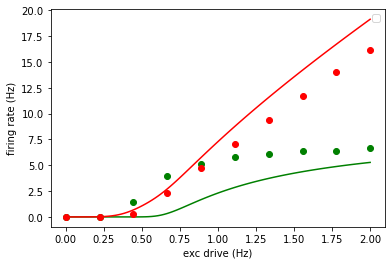

In [24]:
plt.plot(MFtt, MFfe, 'g')
plt.plot(MFtt, MFfi, 'r')
plt.plot(TNtt, TNfe, 'og')
plt.plot(TNtt, TNfi, 'or')

plt.xlabel("exc drive (Hz)")
plt.ylabel("firing rate (Hz)")
plt.legend()
plt.savefig(f"gfx\\comp_scan2.png", dpi=250)

In [9]:
[1,2,3,4][-2:]

[3, 4]